In [47]:
!pip install git+https://github.com/UKPLab/sentence-transformers.git

  Cloning https://github.com/UKPLab/sentence-transformers.git to /tmp/pip-req-build-pejqhbul
  Running command git clone --filter=blob:none --quiet https://github.com/UKPLab/sentence-transformers.git /tmp/pip-req-build-pejqhbul
  Resolved https://github.com/UKPLab/sentence-transformers.git to commit 560cc336b1c483da2c8994312c6e1e7b824f9792
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [48]:
english_words = ["food", "dog", "phone", "music", "green", "leaf", "walk", "piano", "mountain", "star"]
korean_words = ["음식", "개", "전화기", "음악", "초록색", "나뭇잎", "산책", "피아노", "산", "별"]

In [49]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("distiluse-base-multilingual-cased-v2")

embeddings_for_english = model.encode(english_words)
print(embeddings_for_english.shape)

embeddings_for_korean = model.encode(korean_words)
print(embeddings_for_korean.shape)

similarities = model.similarity(embeddings_for_english, embeddings_for_korean)
print(similarities)

(10, 512)
(10, 512)
tensor([[0.9708, 0.4422, 0.3584, 0.4593, 0.2866, 0.3810, 0.4206, 0.3381, 0.4212,
         0.4270],
        [0.5451, 0.9427, 0.4595, 0.4820, 0.3393, 0.4880, 0.4918, 0.4456, 0.5271,
         0.5680],
        [0.4101, 0.4691, 0.9237, 0.4511, 0.2734, 0.3869, 0.4181, 0.4027, 0.4289,
         0.4436],
        [0.4902, 0.4485, 0.4110, 0.9868, 0.3163, 0.3656, 0.4103, 0.6209, 0.4250,
         0.4735],
        [0.3741, 0.3733, 0.2962, 0.3358, 0.9568, 0.4579, 0.3569, 0.3094, 0.4200,
         0.4244],
        [0.4326, 0.4751, 0.3445, 0.3369, 0.4093, 0.9014, 0.4260, 0.3748, 0.5083,
         0.4885],
        [0.4380, 0.4902, 0.4075, 0.3922, 0.2855, 0.4109, 0.9589, 0.3939, 0.4915,
         0.4584],
        [0.5233, 0.5955, 0.4787, 0.6505, 0.3775, 0.5394, 0.5209, 0.8966, 0.5582,
         0.6448],
        [0.3718, 0.4038, 0.2972, 0.3193, 0.2887, 0.4297, 0.4374, 0.2740, 0.9337,
         0.4267],
        [0.4398, 0.4765, 0.3668, 0.4191, 0.3194, 0.4511, 0.4290, 0.3958, 0.4797,
        

In [50]:
for idx_i, sentence1 in enumerate(english_words):
    print(sentence1)
    for idx_j, sentence2 in enumerate(korean_words):
        print(f" - {sentence2: <30}: {similarities[idx_i][idx_j]:.4f}")

food
 - 음식                            : 0.9708
 - 개                             : 0.4422
 - 전화기                           : 0.3584
 - 음악                            : 0.4593
 - 초록색                           : 0.2866
 - 나뭇잎                           : 0.3810
 - 산책                            : 0.4206
 - 피아노                           : 0.3381
 - 산                             : 0.4212
 - 별                             : 0.4270
dog
 - 음식                            : 0.5451
 - 개                             : 0.9427
 - 전화기                           : 0.4595
 - 음악                            : 0.4820
 - 초록색                           : 0.3393
 - 나뭇잎                           : 0.4880
 - 산책                            : 0.4918
 - 피아노                           : 0.4456
 - 산                             : 0.5271
 - 별                             : 0.5680
phone
 - 음식                            : 0.4101
 - 개                             : 0.4691
 - 전화기                           : 0.9237
 - 음악              

In [51]:
!wget -q https://github.com/GoogleFonts/noto-cjk/raw/main/fonts/NotoSansCJKkr-Medium.ttf -O NotoSansCJKkr-Medium.ttf
!mv NotoSansCJKkr-Medium.ttf /usr/share/fonts/truetype/

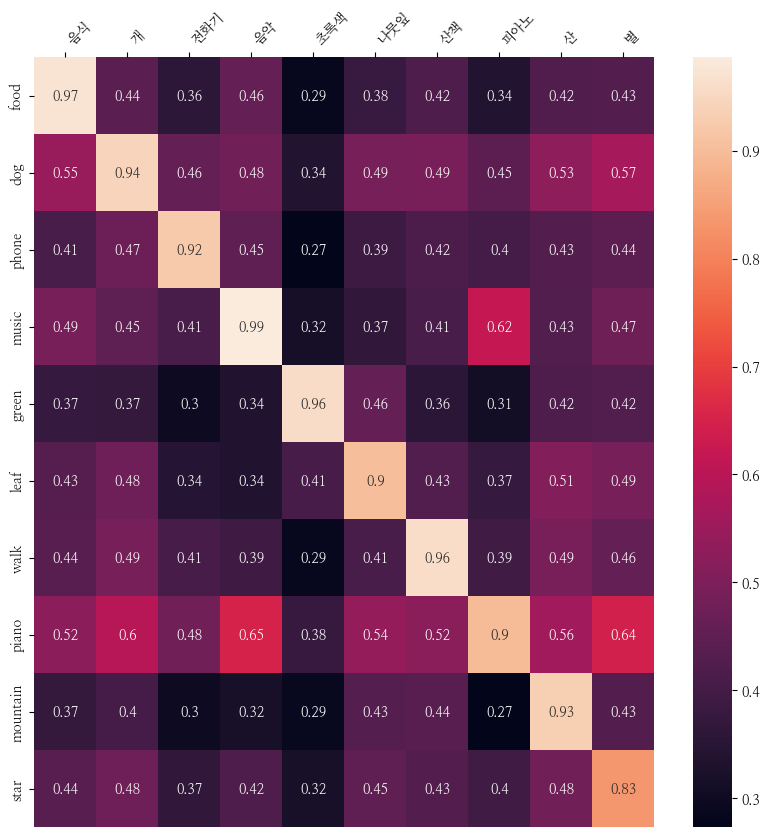

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

path = '/usr/share/fonts/opentype/noto/NotoSansCJK-Medium.ttc'
fm.fontManager.addfont(path)

prop = fm.FontProperties(fname=path)
font_name = prop.get_name()

plt.figure(figsize=(10, 10))
ax = sns.heatmap(similarities, xticklabels=korean_words, yticklabels=english_words, annot=True)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

plt.xticks(rotation=45, ha='left')

plt.savefig('name_heatmap.png')

plt.show()

In [53]:
from google.colab import files
files.download('name_heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>